# Loading Cleaned Parquet Files and Initial Analysis

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

Let's now read the cleaned Parquet files using pandas and conduct some cross‑dataset analysis:

- `building_index_cleaned_ireland.parquet`
- `exports_values_cleaned_canada.parquet`
- `non_res_buildings_cleaned_canada.parquet`
- `trade_stats_cleaned_ireland.parquet`

In [12]:
parquet_files = {
    'building_index_ireland': 'datasets/building_index_cleaned_ireland.parquet',
    'trade_stats_ireland':    'datasets/trade_stats_cleaned_ireland.parquet',
    'exports_values_canada': 'datasets/exports_values_cleaned_canada.parquet',
    'buildings_canada': 'datasets/non_res_buildings_cleaned_canada.parquet',
}

In [13]:
df_clean = {name: pd.read_parquet(path) for name, path in parquet_files.items()}

In [14]:
for name, df in df_clean.items():
    print(f"{name}: {df.shape[0]} rows x {df.shape[1]} columns")

building_index_ireland: 2020 rows x 4 columns
trade_stats_ireland: 1008 rows x 5 columns
exports_values_canada: 20142 rows x 9 columns
buildings_canada: 266454 rows x 8 columns


In [15]:
df_building_index_ie = df_clean['building_index_ireland']
df_trade_stats_ie = df_clean['trade_stats_ireland']
df_exports_values_ca = df_clean['exports_values_canada']
df_buildings_ca = df_clean['buildings_canada']

In [16]:
df_building_index_ie

,Statistic,Quarter,Type of Building and Construction,DATA
0,Value of Production Index in Building and Cons...,2000Q1,All building and construction,143.5149774
1,Value of Production Index in Building and Cons...,2000Q1,Building (excluding civil engineering),182.7958023
2,Value of Production Index in Building and Cons...,2000Q1,Residential building,279.2815512
3,Value of Production Index in Building and Cons...,2000Q1,Non-residential building,115.3595084
4,Value of Production Index in Building and Cons...,2000Q1,Civil engineering,60.43888692
...,...,...,...,...
2015,Volume of Production Index in Building and Con...,2025Q1,All building and construction,134.9900995
2016,Volume of Production Index in Building and Con...,2025Q1,Building (excluding civil engineering),132.0952433
2017,Volume of Production Index in Building and Con...,2025Q1,Residential building,101.1861585
2018,Volume of Production Index in Building and Con...,2025Q1,Non-residential building,138.6518319


In [17]:
df_trade_stats_ie

,Statistic,Year,Sector of Activity,Size of Enterprise,DATA
0,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),615
1,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Small (10 to 49),545
2,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),1985
3,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Large (250 or more),14778
4,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Unknown,None
...,...,...,...,...,...
1003,Number of Importing Enterprises,2022,All sectors,Small (10 to 49),9768
1004,Number of Importing Enterprises,2022,All sectors,Medium (50 to 249),2692
1005,Number of Importing Enterprises,2022,All sectors,Large (250 or more),780
1006,Number of Importing Enterprises,2022,All sectors,Unknown,2


In [18]:
df_buildings_ca

,REF_DATE,GEO,Type of building,Division,UOM,SCALAR_FACTOR,VALUE,DECIMALS
0,1981-01,Fifteen census metropolitan area composite,Non-residential buildings [622],Division composite,"Index, 2023=100",units,24.6,1
1,1981-01,Fifteen census metropolitan area composite,Commercial buildings [62212],Division composite,"Index, 2023=100",units,25.4,1
2,1981-01,Fifteen census metropolitan area composite,Office building [62212],Division composite,"Index, 2023=100",units,26.7,1
3,1981-01,Fifteen census metropolitan area composite,Warehouse [62212],Division composite,"Index, 2023=100",units,23.5,1
4,1981-01,Fifteen census metropolitan area composite,Shopping centre [62212],Division composite,"Index, 2023=100",units,25.8,1
...,...,...,...,...,...,...,...,...
266449,2025-01,"Victoria, British Columbia",School,Communications,"Index, 2023=100",units,108.0,1
266450,2025-01,"Victoria, British Columbia",School,Electrical safety and security,"Index, 2023=100",units,107.5,1
266451,2025-01,"Victoria, British Columbia",School,Earthwork,"Index, 2023=100",units,104.8,1
266452,2025-01,"Victoria, British Columbia",School,Exterior improvements,"Index, 2023=100",units,109.3,1


In [19]:
df_exports_values_ca

,REF_DATE,GEO,Estimates,Enterprise employment size,North American Industry Classification System (NAICS),UOM,SCALAR_FACTOR,VALUE,DECIMALS
0,2000,Canada,Value of exports,All enterprise employment sizes,All industries,Dollars,thousands,371595043.0,0
1,2000,Canada,Value of exports,All enterprise employment sizes,"Agriculture, forestry, fishing and hunting [11]",Dollars,thousands,3291025.0,0
2,2000,Canada,Value of exports,All enterprise employment sizes,"Mining, quarrying, and oil and gas extraction ...",Dollars,thousands,35923599.0,0
3,2000,Canada,Value of exports,All enterprise employment sizes,Oil and gas extraction [211],Dollars,thousands,25566055.0,0
4,2000,Canada,Value of exports,All enterprise employment sizes,Mining and quarrying (except oil and gas) [212],Dollars,thousands,9931346.0,0
...,...,...,...,...,...,...,...,...,...
20137,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Health care and social assistance [62],Number,units,37.0,0
20138,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),"Arts, entertainment and recreation [71]",Number,units,22.0,0
20139,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Accommodation and food services [72],Number,units,14.0,0
20140,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Other services (except public administration) ...,Number,units,12.0,0


# Lets first standardize the data and see the construction datasets for both ireland and canada

In [20]:
df_buildings_ca['Type of building'].value_counts()

Type of building
Non-residential buildings [622]                                  17919
Commercial buildings [62212]                                     17919
Office building [62212]                                          17919
Institutional buildings [62213]                                  17919
School                                                           17919
High-rise apartment building (five or more storeys) [621111]     17703
Apartment buildings                                              17496
Residential buildings [621]                                      17496
Industrial buildings [62211]                                     17190
Low-rise apartment building (fewer than five storeys) [62111]    16767
Factory                                                          16461
Bus depot with maintenance and repair facilities                 16038
Shopping centre [62212]                                          15732
Warehouse [62212]                                           

In [21]:
df_building_index_ie['Type of Building and Construction'].value_counts()

Type of Building and Construction
All building and construction             404
Building (excluding civil engineering)    404
Residential building                      404
Non-residential building                  404
Civil engineering                         404
Name: count, dtype: int64

As you can see we have more detailed stats for canada but less for ireland, meaning we need to remap the values

In [22]:
def map_ca_building_type(btype):
    
    if "Non-residential buildings [622]" == btype:
        return "Non-Residential"
    if "Residential buildings [621]" == btype or "apartment" in btype or "single-detached" in btype or "townhouse" in btype:
        return "Residential"
    else:
        return "Other"

In [23]:
df_buildings_ca['Building_Category'] = df_buildings_ca['Type of building'].apply(map_ca_building_type)
canada_counts = df_buildings_ca['Building_Category'].value_counts()
valid_categories = canada_counts.index.tolist()

In [24]:
def map_ie_building_type(btype):
    
    if "Non-residential building" == btype:
        return "Non-Residential"
    if "Residential building" == btype:
        return "Residential"
    else:
        return "Other"

In [25]:
df_building_index_ie['Building_Category'] = df_building_index_ie['Type of Building and Construction'].apply(map_ie_building_type)

In [26]:
ireland_counts = df_building_index_ie['Building_Category'].value_counts()
ireland_counts = ireland_counts.reindex(valid_categories, fill_value=0)

In [27]:
df_buildings_ca

,REF_DATE,GEO,Type of building,Division,UOM,SCALAR_FACTOR,VALUE,DECIMALS,Building_Category
0,1981-01,Fifteen census metropolitan area composite,Non-residential buildings [622],Division composite,"Index, 2023=100",units,24.6,1,Non-Residential
1,1981-01,Fifteen census metropolitan area composite,Commercial buildings [62212],Division composite,"Index, 2023=100",units,25.4,1,Other
2,1981-01,Fifteen census metropolitan area composite,Office building [62212],Division composite,"Index, 2023=100",units,26.7,1,Other
3,1981-01,Fifteen census metropolitan area composite,Warehouse [62212],Division composite,"Index, 2023=100",units,23.5,1,Other
4,1981-01,Fifteen census metropolitan area composite,Shopping centre [62212],Division composite,"Index, 2023=100",units,25.8,1,Other
...,...,...,...,...,...,...,...,...,...
266449,2025-01,"Victoria, British Columbia",School,Communications,"Index, 2023=100",units,108.0,1,Other
266450,2025-01,"Victoria, British Columbia",School,Electrical safety and security,"Index, 2023=100",units,107.5,1,Other
266451,2025-01,"Victoria, British Columbia",School,Earthwork,"Index, 2023=100",units,104.8,1,Other
266452,2025-01,"Victoria, British Columbia",School,Exterior improvements,"Index, 2023=100",units,109.3,1,Other


In [28]:
df_buildings_ca['Building_Category'].value_counts()

Building_Category
Other              196569
Residential         51966
Non-Residential     17919
Name: count, dtype: int64

In [29]:
df_building_index_ie['Building_Category'].value_counts()

Building_Category
Other              1212
Residential         404
Non-Residential     404
Name: count, dtype: int64

In [30]:
final_df = pd.DataFrame({
    'Category': valid_categories,
    'Count_Canada': canada_counts[valid_categories].values,
    'Count_Ireland': ireland_counts[valid_categories].values
})

In [31]:
final_df['Canada (%)'] = final_df['Count_Canada'] / final_df['Count_Canada'].sum() * 100
final_df['Ireland (%)'] = final_df['Count_Ireland'] / final_df['Count_Ireland'].sum() * 100

# Display
print(final_df)

          Category  Count_Canada  Count_Ireland  Canada (%)  Ireland (%)
0            Other        196569           1212   73.772208         60.0
1      Residential         51966            404   19.502803         20.0
2  Non-Residential         17919            404    6.724988         20.0


# Construction data is now harmonized and they both have categories which are equal and can be used for any ML algorithm

# Lets start now for the exports dfs

In [32]:
df_trade_stats_ie['Sector of Activity'].value_counts()

Sector of Activity
Agriculture and Food (01-03,10-11)                            144
Chemicals and Pharmaceuticals (20-21)                         144
Other Manufacturing and Construction (05-09, 12-19, 22-43)    144
Wholesale and Retail (45-47)                                  144
Services/other (49-98)                                        144
Unknown                                                       144
All sectors                                                   144
Name: count, dtype: int64

In [33]:
df_trade_stats_ie['Statistic'].value_counts()

Statistic
Value of Exports                   252
Number of Exporting Enterprises    252
Value of Imports                   252
Number of Importing Enterprises    252
Name: count, dtype: int64

In [34]:
df_exports_values_ca['North American Industry Classification System (NAICS)'].value_counts()

North American Industry Classification System (NAICS)
All industries                                                                450
Agriculture, forestry, fishing and hunting [11]                               450
Mining, quarrying, and oil and gas extraction [21]                            450
Oil and gas extraction [211]                                                  450
Mining and quarrying (except oil and gas) [212]                               450
Support activities for mining, and oil and gas extraction [213]               450
Construction [23]                                                             450
Manufacturing [31-33]                                                         450
Food manufacturing [311]                                                      450
Beverage and tobacco product manufacturing [312]                              450
Paper manufacturing [322]                                                     450
Wood product manufacturing [321]            

In [35]:
df_exports_values_ca['Estimates'].value_counts()

Estimates
Value of exports                   10071
Number of exporting enterprises    10071
Name: count, dtype: int64

We need to standardize these two features to further carry on our investigation on the data 

## 1. Filter both datasets to have same statistics

In [36]:
df_trade_stats_ie_filtered = df_trade_stats_ie[
    df_trade_stats_ie['Statistic'].isin(['Value of Exports', 'Number of Exporting Enterprises'])
]

In [37]:
# Canada already has only exports data, so keep as is
df_exports_values_ca_filtered = df_exports_values_ca.copy()

## 2. Create sector mapping from Ireland to Canada NAICS

In [38]:
naics_to_sector = {
    'Agriculture, forestry, fishing and hunting [11]': 'Agriculture and Food (01-03,10-11)',
    'Food manufacturing [311]': 'Agriculture and Food (01-03,10-11)',
    'Chemical manufacturing [325]': 'Chemicals and Pharmaceuticals (20-21)',
    'Manufacturing [31-33]': 'Other Manufacturing and Construction (05-09, 12-19, 22-43)',
    'Construction [23]': 'Other Manufacturing and Construction (05-09, 12-19, 22-43)',
    'Wholesale trade [41]': 'Wholesale and Retail (45-47)',
    'Retail trade [44-45]': 'Wholesale and Retail (45-47)',
    'Transportation and warehousing [48-49]': 'Services/other (49-98)',
    'Information and cultural industries [51]': 'Services/other (49-98)',
    'Finance and insurance [52]': 'Services/other (49-98)',
    'All industries': 'All sectors'
}

## 3. Filter Canada data to keep only mapped sectors

In [39]:
df_exports_values_ca_filtered = df_exports_values_ca_filtered[
    df_exports_values_ca_filtered['North American Industry Classification System (NAICS)'].isin(naics_to_sector.keys())
].copy()

In [40]:
df_exports_values_ca_filtered['Sector of Activity'] = df_exports_values_ca_filtered['North American Industry Classification System (NAICS)'].map(naics_to_sector)

In [41]:
df_exports_values_ca_filtered['Estimates'].value_counts()

Estimates
Value of exports                   2475
Number of exporting enterprises    2475
Name: count, dtype: int64

In [42]:
df_trade_stats_ie_filtered['Statistic'].value_counts()

Statistic
Value of Exports                   252
Number of Exporting Enterprises    252
Name: count, dtype: int64

In [43]:
df_trade_stats_ie_filtered['Sector of Activity'].value_counts()

Sector of Activity
Agriculture and Food (01-03,10-11)                            72
Chemicals and Pharmaceuticals (20-21)                         72
Other Manufacturing and Construction (05-09, 12-19, 22-43)    72
Wholesale and Retail (45-47)                                  72
Services/other (49-98)                                        72
Unknown                                                       72
All sectors                                                   72
Name: count, dtype: int64

In [44]:
df_exports_values_ca_filtered['Sector of Activity'].value_counts()

Sector of Activity
Services/other (49-98)                                        1350
Agriculture and Food (01-03,10-11)                             900
Wholesale and Retail (45-47)                                   900
Other Manufacturing and Construction (05-09, 12-19, 22-43)     900
All sectors                                                    450
Chemicals and Pharmaceuticals (20-21)                          450
Name: count, dtype: int64

### Need to remove unknown from df_trade_stats_ie_filtered['Sector of Activity']

In [45]:
# need to remove unknown from df_trade_stats_ie_filtered['Sector of Activity']
df_trade_stats_ie_filtered = df_trade_stats_ie_filtered[
    df_trade_stats_ie_filtered['Sector of Activity'] != 'Unknown'
]

In [46]:
len(df_trade_stats_ie_filtered['Sector of Activity'].value_counts()) == len(df_exports_values_ca_filtered['Sector of Activity'].value_counts())

True

In [47]:
print(df_building_index_ie['Quarter'].value_counts())

Quarter
2000Q1    20
2000Q2    20
2000Q3    20
2000Q4    20
2001Q1    20
          ..
2024Q1    20
2024Q2    20
2024Q3    20
2024Q4    20
2025Q1    20
Name: count, Length: 101, dtype: int64


In [48]:
df_buildings_ca['REF_DATE'].value_counts()

REF_DATE
2023-01    8750
2023-04    8750
2024-10    8750
2024-07    8750
2024-04    8750
           ... 
1984-01      72
1984-04      72
1984-07      72
1984-10      72
1981-01      72
Name: count, Length: 177, dtype: int64

In [49]:
df_exports_values_ca_filtered

,REF_DATE,GEO,Estimates,Enterprise employment size,North American Industry Classification System (NAICS),UOM,SCALAR_FACTOR,VALUE,DECIMALS,Sector of Activity
0,2000,Canada,Value of exports,All enterprise employment sizes,All industries,Dollars,thousands,371595043.0,0,All sectors
1,2000,Canada,Value of exports,All enterprise employment sizes,"Agriculture, forestry, fishing and hunting [11]",Dollars,thousands,3291025.0,0,"Agriculture and Food (01-03,10-11)"
7,2000,Canada,Value of exports,All enterprise employment sizes,Construction [23],Dollars,thousands,1562807.0,0,"Other Manufacturing and Construction (05-09, 1..."
8,2000,Canada,Value of exports,All enterprise employment sizes,Manufacturing [31-33],Dollars,thousands,279564560.0,0,"Other Manufacturing and Construction (05-09, 1..."
9,2000,Canada,Value of exports,All enterprise employment sizes,Food manufacturing [311],Dollars,thousands,11623733.0,0,"Agriculture and Food (01-03,10-11)"
...,...,...,...,...,...,...,...,...,...,...
20127,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Wholesale trade [41],Number,units,152.0,0,Wholesale and Retail (45-47)
20128,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Retail trade [44-45],Number,units,84.0,0,Wholesale and Retail (45-47)
20129,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Transportation and warehousing [48-49],Number,units,68.0,0,Services/other (49-98)
20130,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Information and cultural industries [51],Number,units,23.0,0,Services/other (49-98)


In [50]:
df_trade_stats_ie_filtered

,Statistic,Year,Sector of Activity,Size of Enterprise,DATA
0,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),615
1,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Small (10 to 49),545
2,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),1985
3,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Large (250 or more),14778
4,Value of Exports,2017,"Agriculture and Food (01-03,10-11)",Unknown,None
...,...,...,...,...,...
499,Number of Exporting Enterprises,2022,All sectors,Small (10 to 49),3129
500,Number of Exporting Enterprises,2022,All sectors,Medium (50 to 249),1268
501,Number of Exporting Enterprises,2022,All sectors,Large (250 or more),469
502,Number of Exporting Enterprises,2022,All sectors,Unknown,2


In [51]:
print(df_exports_values_ca_filtered['REF_DATE'].dtype)

int64


## Have to harmonize dates as first ireland has Quartiles

In [52]:
df_buildings_ca['REF_DATE'] = pd.to_datetime(df_buildings_ca['REF_DATE'], format='%Y-%m')

# Create a new column with the quarter format as 'YYYYQn'
df_buildings_ca['Quarter'] = df_buildings_ca['REF_DATE'].dt.to_period('Q').astype(str).str.replace('Q', 'Q')

In [53]:
df_exports_values_ca_filtered['Quarter'] = df_exports_values_ca_filtered['REF_DATE'].astype(str) + 'Q1'

In [54]:
df_exports_values_ca_filtered

,REF_DATE,GEO,Estimates,Enterprise employment size,North American Industry Classification System (NAICS),UOM,SCALAR_FACTOR,VALUE,DECIMALS,Sector of Activity,Quarter
0,2000,Canada,Value of exports,All enterprise employment sizes,All industries,Dollars,thousands,371595043.0,0,All sectors,2000Q1
1,2000,Canada,Value of exports,All enterprise employment sizes,"Agriculture, forestry, fishing and hunting [11]",Dollars,thousands,3291025.0,0,"Agriculture and Food (01-03,10-11)",2000Q1
7,2000,Canada,Value of exports,All enterprise employment sizes,Construction [23],Dollars,thousands,1562807.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1
8,2000,Canada,Value of exports,All enterprise employment sizes,Manufacturing [31-33],Dollars,thousands,279564560.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1
9,2000,Canada,Value of exports,All enterprise employment sizes,Food manufacturing [311],Dollars,thousands,11623733.0,0,"Agriculture and Food (01-03,10-11)",2000Q1
...,...,...,...,...,...,...,...,...,...,...,...
20127,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Wholesale trade [41],Number,units,152.0,0,Wholesale and Retail (45-47),2024Q1
20128,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Retail trade [44-45],Number,units,84.0,0,Wholesale and Retail (45-47),2024Q1
20129,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Transportation and warehousing [48-49],Number,units,68.0,0,Services/other (49-98),2024Q1
20130,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Information and cultural industries [51],Number,units,23.0,0,Services/other (49-98),2024Q1


In [55]:
df_trade_stats_ie_filtered['Year'] = pd.to_datetime(
    df_trade_stats_ie_filtered['Year'], format='mixed', errors='coerce'
)

# Create a new column with the quarter format as 'YYYYQn'
df_trade_stats_ie_filtered['Quarter'] = df_trade_stats_ie_filtered['Year'].dt.to_period('Q').astype(str)

In [56]:
df_building_index_ie

,Statistic,Quarter,Type of Building and Construction,DATA,Building_Category
0,Value of Production Index in Building and Cons...,2000Q1,All building and construction,143.5149774,Other
1,Value of Production Index in Building and Cons...,2000Q1,Building (excluding civil engineering),182.7958023,Other
2,Value of Production Index in Building and Cons...,2000Q1,Residential building,279.2815512,Residential
3,Value of Production Index in Building and Cons...,2000Q1,Non-residential building,115.3595084,Non-Residential
4,Value of Production Index in Building and Cons...,2000Q1,Civil engineering,60.43888692,Other
...,...,...,...,...,...
2015,Volume of Production Index in Building and Con...,2025Q1,All building and construction,134.9900995,Other
2016,Volume of Production Index in Building and Con...,2025Q1,Building (excluding civil engineering),132.0952433,Other
2017,Volume of Production Index in Building and Con...,2025Q1,Residential building,101.1861585,Residential
2018,Volume of Production Index in Building and Con...,2025Q1,Non-residential building,138.6518319,Non-Residential


In [57]:
df_buildings_ca

,REF_DATE,GEO,Type of building,Division,UOM,SCALAR_FACTOR,VALUE,DECIMALS,Building_Category,Quarter
0,1981-01-01,Fifteen census metropolitan area composite,Non-residential buildings [622],Division composite,"Index, 2023=100",units,24.6,1,Non-Residential,1981Q1
1,1981-01-01,Fifteen census metropolitan area composite,Commercial buildings [62212],Division composite,"Index, 2023=100",units,25.4,1,Other,1981Q1
2,1981-01-01,Fifteen census metropolitan area composite,Office building [62212],Division composite,"Index, 2023=100",units,26.7,1,Other,1981Q1
3,1981-01-01,Fifteen census metropolitan area composite,Warehouse [62212],Division composite,"Index, 2023=100",units,23.5,1,Other,1981Q1
4,1981-01-01,Fifteen census metropolitan area composite,Shopping centre [62212],Division composite,"Index, 2023=100",units,25.8,1,Other,1981Q1
...,...,...,...,...,...,...,...,...,...,...
266449,2025-01-01,"Victoria, British Columbia",School,Communications,"Index, 2023=100",units,108.0,1,Other,2025Q1
266450,2025-01-01,"Victoria, British Columbia",School,Electrical safety and security,"Index, 2023=100",units,107.5,1,Other,2025Q1
266451,2025-01-01,"Victoria, British Columbia",School,Earthwork,"Index, 2023=100",units,104.8,1,Other,2025Q1
266452,2025-01-01,"Victoria, British Columbia",School,Exterior improvements,"Index, 2023=100",units,109.3,1,Other,2025Q1


In [58]:
df_trade_stats_ie_filtered

,Statistic,Year,Sector of Activity,Size of Enterprise,DATA,Quarter
0,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),615,2017Q1
1,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Small (10 to 49),545,2017Q1
2,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),1985,2017Q1
3,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Large (250 or more),14778,2017Q1
4,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Unknown,None,2017Q1
...,...,...,...,...,...,...
499,Number of Exporting Enterprises,2022-01-01,All sectors,Small (10 to 49),3129,2022Q1
500,Number of Exporting Enterprises,2022-01-01,All sectors,Medium (50 to 249),1268,2022Q1
501,Number of Exporting Enterprises,2022-01-01,All sectors,Large (250 or more),469,2022Q1
502,Number of Exporting Enterprises,2022-01-01,All sectors,Unknown,2,2022Q1


In [59]:
df_exports_values_ca_filtered

,REF_DATE,GEO,Estimates,Enterprise employment size,North American Industry Classification System (NAICS),UOM,SCALAR_FACTOR,VALUE,DECIMALS,Sector of Activity,Quarter
0,2000,Canada,Value of exports,All enterprise employment sizes,All industries,Dollars,thousands,371595043.0,0,All sectors,2000Q1
1,2000,Canada,Value of exports,All enterprise employment sizes,"Agriculture, forestry, fishing and hunting [11]",Dollars,thousands,3291025.0,0,"Agriculture and Food (01-03,10-11)",2000Q1
7,2000,Canada,Value of exports,All enterprise employment sizes,Construction [23],Dollars,thousands,1562807.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1
8,2000,Canada,Value of exports,All enterprise employment sizes,Manufacturing [31-33],Dollars,thousands,279564560.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1
9,2000,Canada,Value of exports,All enterprise employment sizes,Food manufacturing [311],Dollars,thousands,11623733.0,0,"Agriculture and Food (01-03,10-11)",2000Q1
...,...,...,...,...,...,...,...,...,...,...,...
20127,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Wholesale trade [41],Number,units,152.0,0,Wholesale and Retail (45-47),2024Q1
20128,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Retail trade [44-45],Number,units,84.0,0,Wholesale and Retail (45-47),2024Q1
20129,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Transportation and warehousing [48-49],Number,units,68.0,0,Services/other (49-98),2024Q1
20130,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Information and cultural industries [51],Number,units,23.0,0,Services/other (49-98),2024Q1


In [61]:
df_exports_values_ca_filtered['SCALAR_FACTOR'].value_counts()

SCALAR_FACTOR
thousands    2475
units        2475
Name: count, dtype: int64

In [62]:
df_buildings_ca['SCALAR_FACTOR'].value_counts()

SCALAR_FACTOR
units    266454
Name: count, dtype: int64

# Now we need to harmonize the values as well as:
Units are for trades in ireland:

UNITS("Value of Exports")="Euro Million"
UNITS("Number of Exporting Enterprises")="Number"

For canada:

UOM is Dollars (Canadian) and in thousands Scaler factor is thousands and units

Also one more change is for Units for buildings datasets:

ireland has: UNITS="Base 2015=100"

and canada has:

UOM as Index, 2023=100 and Scalar factor as units

In [63]:
CAD_TO_EUR = 0.68

In [64]:
def convert_canada_exports(row):
    if row['SCALAR_FACTOR'] == 'thousands' and 'Dollars' in row['UOM']:
        # Convert thousands of CAD → Million EUR
        return (row['VALUE'] * 1000) / 1_000_000 * 0.68
    elif row['SCALAR_FACTOR'] == 'units' and 'Number' in row['UOM']:
        # Keep as number of enterprises, not currency
        return row['VALUE']
    else:
        return None  # if it's an unrecognized case

In [65]:
df_exports_values_ca_filtered['Export_Value_EUR'] = df_exports_values_ca_filtered.apply(
    convert_canada_exports, axis=1
)

In [67]:
df_exports_values_ca_filtered['Export_Unit'] = df_exports_values_ca_filtered['UOM'].map(
    lambda x: 'Million EUR' if 'Dollars' in x else 'Enterprises'
)

In [69]:
df_trade_stats_ie_filtered['Export_Unit'] = df_trade_stats_ie_filtered['Statistic'].map(
    lambda x: 'Million EUR' if 'Value of Exports' in x else 'Enterprises'
)

In [70]:
df_trade_stats_ie_filtered

,Statistic,Year,Sector of Activity,Size of Enterprise,DATA,Quarter,Export_Unit
0,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),615,2017Q1,Million EUR
1,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Small (10 to 49),545,2017Q1,Million EUR
2,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),1985,2017Q1,Million EUR
3,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Large (250 or more),14778,2017Q1,Million EUR
4,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Unknown,None,2017Q1,Million EUR
...,...,...,...,...,...,...,...
499,Number of Exporting Enterprises,2022-01-01,All sectors,Small (10 to 49),3129,2022Q1,Enterprises
500,Number of Exporting Enterprises,2022-01-01,All sectors,Medium (50 to 249),1268,2022Q1,Enterprises
501,Number of Exporting Enterprises,2022-01-01,All sectors,Large (250 or more),469,2022Q1,Enterprises
502,Number of Exporting Enterprises,2022-01-01,All sectors,Unknown,2,2022Q1,Enterprises


In [68]:
df_exports_values_ca_filtered

,REF_DATE,GEO,Estimates,Enterprise employment size,North American Industry Classification System (NAICS),UOM,SCALAR_FACTOR,VALUE,DECIMALS,Sector of Activity,Quarter,Export_Value_EUR,Export_Unit
0,2000,Canada,Value of exports,All enterprise employment sizes,All industries,Dollars,thousands,371595043.0,0,All sectors,2000Q1,252684.62924,Million EUR
1,2000,Canada,Value of exports,All enterprise employment sizes,"Agriculture, forestry, fishing and hunting [11]",Dollars,thousands,3291025.0,0,"Agriculture and Food (01-03,10-11)",2000Q1,2237.89700,Million EUR
7,2000,Canada,Value of exports,All enterprise employment sizes,Construction [23],Dollars,thousands,1562807.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1,1062.70876,Million EUR
8,2000,Canada,Value of exports,All enterprise employment sizes,Manufacturing [31-33],Dollars,thousands,279564560.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1,190103.90080,Million EUR
9,2000,Canada,Value of exports,All enterprise employment sizes,Food manufacturing [311],Dollars,thousands,11623733.0,0,"Agriculture and Food (01-03,10-11)",2000Q1,7904.13844,Million EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20127,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Wholesale trade [41],Number,units,152.0,0,Wholesale and Retail (45-47),2024Q1,152.00000,Enterprises
20128,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Retail trade [44-45],Number,units,84.0,0,Wholesale and Retail (45-47),2024Q1,84.00000,Enterprises
20129,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Transportation and warehousing [48-49],Number,units,68.0,0,Services/other (49-98),2024Q1,68.00000,Enterprises
20130,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Information and cultural industries [51],Number,units,23.0,0,Services/other (49-98),2024Q1,23.00000,Enterprises


In [86]:
# Rename for clarity
df_ie = df_building_index_ie.rename(columns={'DATA': 'Ireland_Index'})
df_ca = df_buildings_ca.rename(columns={'VALUE': 'Canada_Index'})

# Ensure 'Quarter' is string
df_ie['Quarter'] = df_ie['Quarter'].astype(str)
df_ca['Quarter'] = df_ca['Quarter'].astype(str)

# Step 1: Find overlapping quarters
overlap_quarters = sorted(set(df_ie['Quarter']).intersection(df_ca['Quarter']))

# Step 2: Filter both
ie_overlap = df_ie[df_ie['Quarter'].isin(overlap_quarters)]
ca_overlap = df_ca[df_ca['Quarter'].isin(overlap_quarters)]

# Convert the column to numeric, coercing errors into NaN
ie_overlap['Ireland_Index'] = pd.to_numeric(ie_overlap['Ireland_Index'], errors='coerce')
ca_overlap['Canada_Index'] = pd.to_numeric(ca_overlap['Canada_Index'], errors='coerce')

# Now drop rows with NaN if any exist after conversion
ie_overlap = ie_overlap.dropna(subset=['Ireland_Index'])
ca_overlap = ca_overlap.dropna(subset=['Canada_Index'])

# Step 3: Compute mean index over those overlapping quarters
mean_ie = ie_overlap['Ireland_Index'].mean()
mean_ca = ca_overlap['Canada_Index'].mean()

# Step 4: Rebase Canada index to match Ireland's base (2015=100)
rebasing_factor = mean_ie / mean_ca
df_ca['Canada_Index_Rebased'] = df_ca['Canada_Index'] * rebasing_factor

In [87]:
df_ie

,Statistic,Quarter,Type of Building and Construction,Ireland_Index,Building_Category
0,Value of Production Index in Building and Cons...,2000Q1,All building and construction,143.5149774,Other
1,Value of Production Index in Building and Cons...,2000Q1,Building (excluding civil engineering),182.7958023,Other
2,Value of Production Index in Building and Cons...,2000Q1,Residential building,279.2815512,Residential
3,Value of Production Index in Building and Cons...,2000Q1,Non-residential building,115.3595084,Non-Residential
4,Value of Production Index in Building and Cons...,2000Q1,Civil engineering,60.43888692,Other
...,...,...,...,...,...
2015,Volume of Production Index in Building and Con...,2025Q1,All building and construction,134.9900995,Other
2016,Volume of Production Index in Building and Con...,2025Q1,Building (excluding civil engineering),132.0952433,Other
2017,Volume of Production Index in Building and Con...,2025Q1,Residential building,101.1861585,Residential
2018,Volume of Production Index in Building and Con...,2025Q1,Non-residential building,138.6518319,Non-Residential


In [88]:
df_ca

,REF_DATE,GEO,Type of building,Division,UOM,SCALAR_FACTOR,Canada_Index,DECIMALS,Building_Category,Quarter,Canada_Index_Rebased
0,1981-01-01,Fifteen census metropolitan area composite,Non-residential buildings [622],Division composite,"Index, 2023=100",units,24.6,1,Non-Residential,1981Q1,48.669590
1,1981-01-01,Fifteen census metropolitan area composite,Commercial buildings [62212],Division composite,"Index, 2023=100",units,25.4,1,Other,1981Q1,50.252341
2,1981-01-01,Fifteen census metropolitan area composite,Office building [62212],Division composite,"Index, 2023=100",units,26.7,1,Other,1981Q1,52.824311
3,1981-01-01,Fifteen census metropolitan area composite,Warehouse [62212],Division composite,"Index, 2023=100",units,23.5,1,Other,1981Q1,46.493308
4,1981-01-01,Fifteen census metropolitan area composite,Shopping centre [62212],Division composite,"Index, 2023=100",units,25.8,1,Other,1981Q1,51.043716
...,...,...,...,...,...,...,...,...,...,...,...
266449,2025-01-01,"Victoria, British Columbia",School,Communications,"Index, 2023=100",units,108.0,1,Other,2025Q1,213.671371
266450,2025-01-01,"Victoria, British Columbia",School,Electrical safety and security,"Index, 2023=100",units,107.5,1,Other,2025Q1,212.682152
266451,2025-01-01,"Victoria, British Columbia",School,Earthwork,"Index, 2023=100",units,104.8,1,Other,2025Q1,207.340368
266452,2025-01-01,"Victoria, British Columbia",School,Exterior improvements,"Index, 2023=100",units,109.3,1,Other,2025Q1,216.243342


# All dataframes are now harmonized 

# Final datasets

In [89]:
df_ca

,REF_DATE,GEO,Type of building,Division,UOM,SCALAR_FACTOR,Canada_Index,DECIMALS,Building_Category,Quarter,Canada_Index_Rebased
0,1981-01-01,Fifteen census metropolitan area composite,Non-residential buildings [622],Division composite,"Index, 2023=100",units,24.6,1,Non-Residential,1981Q1,48.669590
1,1981-01-01,Fifteen census metropolitan area composite,Commercial buildings [62212],Division composite,"Index, 2023=100",units,25.4,1,Other,1981Q1,50.252341
2,1981-01-01,Fifteen census metropolitan area composite,Office building [62212],Division composite,"Index, 2023=100",units,26.7,1,Other,1981Q1,52.824311
3,1981-01-01,Fifteen census metropolitan area composite,Warehouse [62212],Division composite,"Index, 2023=100",units,23.5,1,Other,1981Q1,46.493308
4,1981-01-01,Fifteen census metropolitan area composite,Shopping centre [62212],Division composite,"Index, 2023=100",units,25.8,1,Other,1981Q1,51.043716
...,...,...,...,...,...,...,...,...,...,...,...
266449,2025-01-01,"Victoria, British Columbia",School,Communications,"Index, 2023=100",units,108.0,1,Other,2025Q1,213.671371
266450,2025-01-01,"Victoria, British Columbia",School,Electrical safety and security,"Index, 2023=100",units,107.5,1,Other,2025Q1,212.682152
266451,2025-01-01,"Victoria, British Columbia",School,Earthwork,"Index, 2023=100",units,104.8,1,Other,2025Q1,207.340368
266452,2025-01-01,"Victoria, British Columbia",School,Exterior improvements,"Index, 2023=100",units,109.3,1,Other,2025Q1,216.243342


In [90]:
df_ie

,Statistic,Quarter,Type of Building and Construction,Ireland_Index,Building_Category
0,Value of Production Index in Building and Cons...,2000Q1,All building and construction,143.5149774,Other
1,Value of Production Index in Building and Cons...,2000Q1,Building (excluding civil engineering),182.7958023,Other
2,Value of Production Index in Building and Cons...,2000Q1,Residential building,279.2815512,Residential
3,Value of Production Index in Building and Cons...,2000Q1,Non-residential building,115.3595084,Non-Residential
4,Value of Production Index in Building and Cons...,2000Q1,Civil engineering,60.43888692,Other
...,...,...,...,...,...
2015,Volume of Production Index in Building and Con...,2025Q1,All building and construction,134.9900995,Other
2016,Volume of Production Index in Building and Con...,2025Q1,Building (excluding civil engineering),132.0952433,Other
2017,Volume of Production Index in Building and Con...,2025Q1,Residential building,101.1861585,Residential
2018,Volume of Production Index in Building and Con...,2025Q1,Non-residential building,138.6518319,Non-Residential


In [91]:
df_exports_values_ca_filtered

,REF_DATE,GEO,Estimates,Enterprise employment size,North American Industry Classification System (NAICS),UOM,SCALAR_FACTOR,VALUE,DECIMALS,Sector of Activity,Quarter,Export_Value_EUR,Export_Unit
0,2000,Canada,Value of exports,All enterprise employment sizes,All industries,Dollars,thousands,371595043.0,0,All sectors,2000Q1,252684.62924,Million EUR
1,2000,Canada,Value of exports,All enterprise employment sizes,"Agriculture, forestry, fishing and hunting [11]",Dollars,thousands,3291025.0,0,"Agriculture and Food (01-03,10-11)",2000Q1,2237.89700,Million EUR
7,2000,Canada,Value of exports,All enterprise employment sizes,Construction [23],Dollars,thousands,1562807.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1,1062.70876,Million EUR
8,2000,Canada,Value of exports,All enterprise employment sizes,Manufacturing [31-33],Dollars,thousands,279564560.0,0,"Other Manufacturing and Construction (05-09, 1...",2000Q1,190103.90080,Million EUR
9,2000,Canada,Value of exports,All enterprise employment sizes,Food manufacturing [311],Dollars,thousands,11623733.0,0,"Agriculture and Food (01-03,10-11)",2000Q1,7904.13844,Million EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20127,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Wholesale trade [41],Number,units,152.0,0,Wholesale and Retail (45-47),2024Q1,152.00000,Enterprises
20128,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Retail trade [44-45],Number,units,84.0,0,Wholesale and Retail (45-47),2024Q1,84.00000,Enterprises
20129,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Transportation and warehousing [48-49],Number,units,68.0,0,Services/other (49-98),2024Q1,68.00000,Enterprises
20130,2024,Canada,Number of exporting enterprises,Large enterprises (500 or more employees),Information and cultural industries [51],Number,units,23.0,0,Services/other (49-98),2024Q1,23.00000,Enterprises


In [92]:
df_trade_stats_ie_filtered

,Statistic,Year,Sector of Activity,Size of Enterprise,DATA,Quarter,Export_Unit
0,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Micro (0 to 9),615,2017Q1,Million EUR
1,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Small (10 to 49),545,2017Q1,Million EUR
2,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Medium (50 to 249),1985,2017Q1,Million EUR
3,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Large (250 or more),14778,2017Q1,Million EUR
4,Value of Exports,2017-01-01,"Agriculture and Food (01-03,10-11)",Unknown,None,2017Q1,Million EUR
...,...,...,...,...,...,...,...
499,Number of Exporting Enterprises,2022-01-01,All sectors,Small (10 to 49),3129,2022Q1,Enterprises
500,Number of Exporting Enterprises,2022-01-01,All sectors,Medium (50 to 249),1268,2022Q1,Enterprises
501,Number of Exporting Enterprises,2022-01-01,All sectors,Large (250 or more),469,2022Q1,Enterprises
502,Number of Exporting Enterprises,2022-01-01,All sectors,Unknown,2,2022Q1,Enterprises


# Now we need to do some undersampling for canada as ireland has less data and canada has too much

## Before undersampling we need to match quarters

In [93]:
# Ensure 'Quarter' columns are strings
df_ie['Quarter'] = df_ie['Quarter'].astype(str)
df_ca['Quarter'] = df_ca['Quarter'].astype(str)

# Step 1: Get Ireland's unique quarters
ireland_quarters = df_ie['Quarter'].unique()

# Step 2: Filter Canada's dataset to only those quarters
df_ca = df_ca[df_ca['Quarter'].isin(ireland_quarters)].copy()

In [94]:
print(f"Ireland Quarters: {len(ireland_quarters)}")
print(f"Canada Quarters (matched): {df_ca['Quarter'].nunique()}")

Ireland Quarters: 101
Canada Quarters (matched): 101


In [96]:
# Ensure 'Quarter' columns are strings for comparison
df_trade_stats_ie_filtered['Quarter'] = df_trade_stats_ie_filtered['Quarter'].astype(str)
df_exports_values_ca_filtered['Quarter'] = df_exports_values_ca_filtered['Quarter'].astype(str)

# Step 1: Get Ireland's quarters
ireland_quarters = df_trade_stats_ie_filtered['Quarter'].unique()

# Step 2: Filter Canada’s data to include only those quarters
df_exports_values_ca_filtered = df_exports_values_ca_filtered[
    df_exports_values_ca_filtered['Quarter'].isin(ireland_quarters)
].copy()

In [97]:
print(f"Ireland Quarters: {len(ireland_quarters)}")
print(f"Canada Quarters (matched): {df_exports_values_ca_filtered['Quarter'].nunique()}")

Ireland Quarters: 6
Canada Quarters (matched): 6


## Now we can start undersampling

In [100]:
df_ca_undersampled = resample(
    df_ca,
    replace=False,                             # No replacement
    n_samples=len(df_ie),                      # Match Ireland's building data size
    random_state=42                            # For reproducibility
)

In [101]:
df_exports_ca_undersampled = resample(
    df_exports_values_ca_filtered,
    replace=False,
    n_samples=len(df_trade_stats_ie_filtered),
    random_state=42
)

In [102]:
print("Ireland Building:", len(df_ie))
print("Canada Building (undersampled):", len(df_ca_undersampled))

print("Ireland Exports:", len(df_trade_stats_ie_filtered))
print("Canada Exports (undersampled):", len(df_exports_ca_undersampled))

Ireland Building: 2020
Canada Building (undersampled): 2020
Ireland Exports: 432
Canada Exports (undersampled): 432


In [105]:
df_ie['Ireland_Index'] = pd.to_numeric(df_ie['Ireland_Index'], errors='coerce')

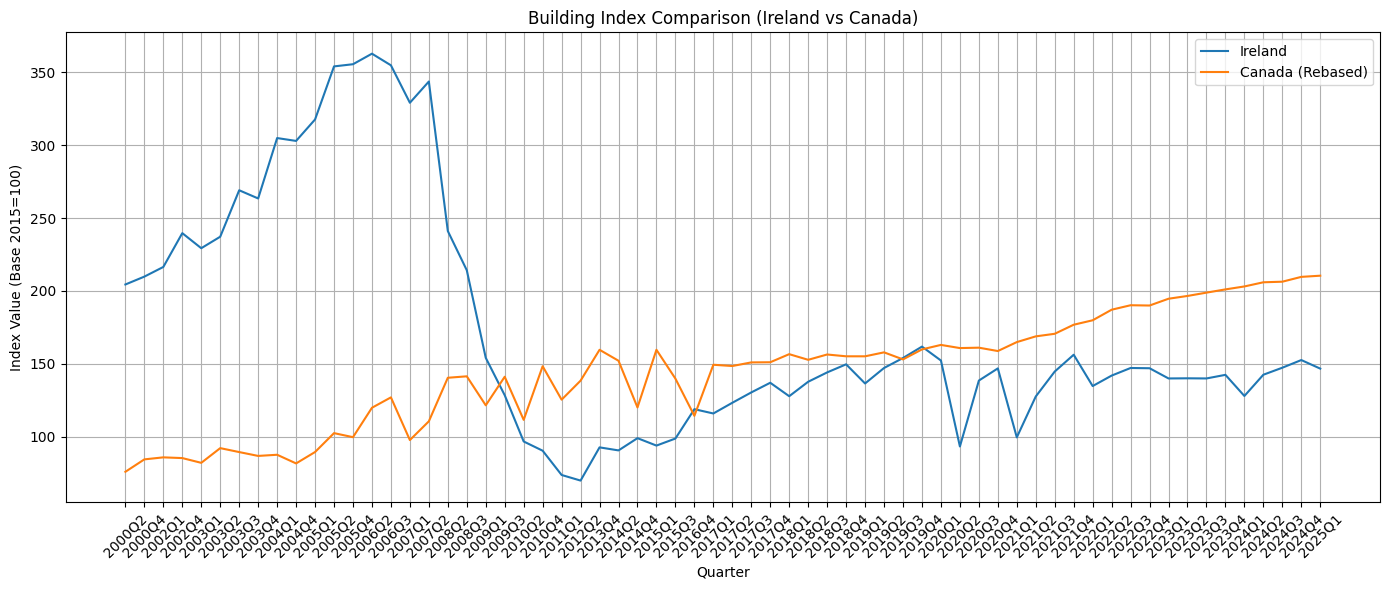

In [126]:
# Compute average index per quarter
ie_building_trend = df_ie.groupby('Quarter')['Ireland_Index'].mean().reset_index()
ca_building_trend = df_ca_undersampled.groupby('Quarter')['Canada_Index_Rebased'].mean().reset_index()

# Merge for side-by-side plotting
building_trend = ie_building_trend.merge(ca_building_trend, on='Quarter', how='inner')
building_trend = building_trend.sort_values('Quarter')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=building_trend, x='Quarter', y='Ireland_Index', label='Ireland')
sns.lineplot(data=building_trend, x='Quarter', y='Canada_Index_Rebased', label='Canada (Rebased)')
plt.xticks(rotation=45)
plt.title('Building Index Comparison (Ireland vs Canada)')
plt.ylabel('Index Value (Base 2015=100)')
plt.xlabel('Quarter')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


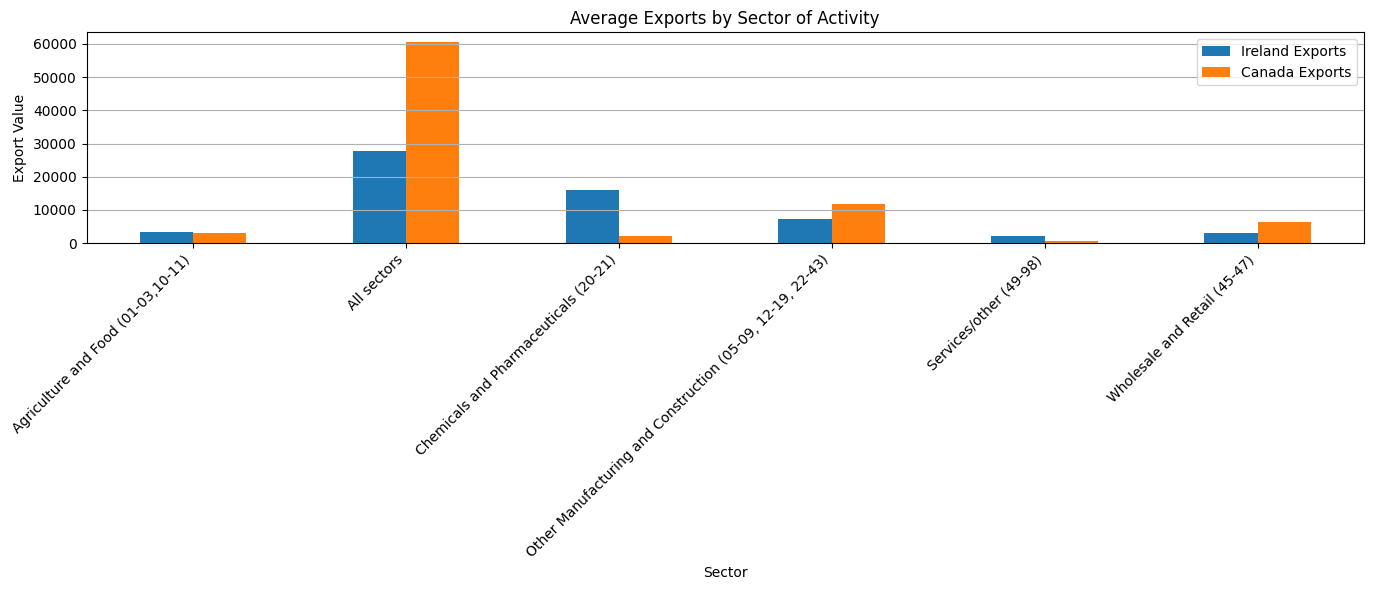

In [110]:
# Clean export value column
df_trade_stats_ie_filtered['DATA'] = pd.to_numeric(df_trade_stats_ie_filtered['DATA'], errors='coerce')
df_exports_ca_undersampled['Export_Value_EUR'] = pd.to_numeric(df_exports_ca_undersampled['Export_Value_EUR'], errors='coerce')

# Group by Sector
ie_exports_by_sector = df_trade_stats_ie_filtered.groupby('Sector of Activity')['DATA'].mean().reset_index()
ca_exports_by_sector = df_exports_ca_undersampled.groupby('Sector of Activity')['Export_Value_EUR'].mean().reset_index()

# Merge and rename for clarity
exports_by_sector = ie_exports_by_sector.merge(ca_exports_by_sector, on='Sector of Activity', how='inner')
exports_by_sector.columns = ['Sector of Activity', 'Ireland Exports', 'Canada Exports']

# Plot
exports_by_sector.set_index('Sector of Activity').plot(kind='bar', figsize=(14, 6))
plt.title('Average Exports by Sector of Activity')
plt.ylabel('Export Value')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# Now we can aggregate the data

In [111]:
print(f"Ireland Buildings index columns: {df_ie.columns.tolist()}")
print(f"Canada Buildings index columns: {df_ca_undersampled.columns.tolist()}")
print(f"Ireland Exports columns: {df_trade_stats_ie_filtered.columns.tolist()}")
print(f"Canada Exports columns: {df_exports_ca_undersampled.columns.tolist()}") 

Ireland Buildings index columns: ['Statistic', 'Quarter', 'Type of Building and Construction', 'Ireland_Index', 'Building_Category']
Canada Buildings index columns: ['REF_DATE', 'GEO', 'Type of building', 'Division', 'UOM', 'SCALAR_FACTOR', 'Canada_Index', 'DECIMALS', 'Building_Category', 'Quarter', 'Canada_Index_Rebased']
Ireland Exports columns: ['Statistic', 'Year', 'Sector of Activity', 'Size of Enterprise', 'DATA', 'Quarter', 'Export_Unit']
Canada Exports columns: ['REF_DATE', 'GEO', 'Estimates', 'Enterprise employment size', 'North American Industry Classification System (NAICS)', 'UOM', 'SCALAR_FACTOR', 'VALUE', 'DECIMALS', 'Sector of Activity', 'Quarter', 'Export_Value_EUR', 'Export_Unit']


# 1. Aggregate Buildings Index (Ireland & Canada)

In [112]:
ireland_buildings_agg = df_ie.groupby(['Quarter', 'Building_Category'])['Ireland_Index'].mean().reset_index()

In [113]:
canada_buildings_agg = df_ca.groupby(['Quarter', 'Building_Category'])['Canada_Index_Rebased'].mean().reset_index()

# 2. Aggregate Exports (Ireland & Canada)

In [114]:
ireland_exports_agg = df_trade_stats_ie_filtered.groupby(['Quarter', 'Sector of Activity'])['DATA'].sum().reset_index()
ireland_exports_agg.rename(columns={'DATA': 'Export_Value_EUR'}, inplace=True)

In [115]:
ireland_exports_agg['Export_Unit'] = 'EUR'

In [116]:
canada_exports_agg = df_exports_values_ca_filtered.groupby(['Quarter', 'Sector of Activity'])['Export_Value_EUR'].sum().reset_index()

In [117]:
canada_exports_agg['Export_Unit'] = 'EUR'

# Final Output Format (Ready for Plotting or Merging)

In [118]:
building_merged = pd.merge(
    ireland_buildings_agg,
    canada_buildings_agg,
    on=['Quarter', 'Building_Category'],
    how='inner'
)

In [119]:
exports_merged = pd.merge(
    ireland_exports_agg,
    canada_exports_agg,
    on=['Quarter', 'Sector of Activity'],
    suffixes=('_Ireland', '_Canada'),
    how='inner'
)

In [120]:
building_merged

,Quarter,Building_Category,Ireland_Index,Canada_Index_Rebased
0,2000Q1,Non-Residential,130.787158,80.868679
1,2000Q1,Other,160.243253,80.312243
2,2000Q1,Residential,374.555552,78.420361
3,2000Q2,Non-Residential,133.982483,82.723465
4,2000Q2,Other,166.175248,82.126842
...,...,...,...,...
298,2024Q4,Other,157.587016,208.578639
299,2024Q4,Residential,129.173586,208.573218
300,2025Q1,Non-Residential,155.625177,210.085752
301,2025Q1,Other,153.843478,210.136694


In [121]:
exports_merged

,Quarter,Sector of Activity,Export_Value_EUR_Ireland,Export_Unit_Ireland,Export_Value_EUR_Canada,Export_Unit_Canada
0,2017Q1,"Agriculture and Food (01-03,10-11)",37180.0,EUR,6.482729e+04,EUR
1,2017Q1,All sectors,260785.0,EUR,9.248013e+05,EUR
2,2017Q1,Chemicals and Pharmaceuticals (20-21),106341.0,EUR,5.729025e+04,EUR
3,2017Q1,"Other Manufacturing and Construction (05-09, 1...",62561.0,EUR,5.066166e+05,EUR
4,2017Q1,Services/other (49-98),22988.0,EUR,2.801161e+04,EUR
5,2017Q1,Wholesale and Retail (45-47),25992.0,EUR,1.619910e+05,EUR
6,2018Q1,"Agriculture and Food (01-03,10-11)",36896.0,EUR,7.645968e+04,EUR
7,2018Q1,All sectors,296921.0,EUR,9.911704e+05,EUR
8,2018Q1,Chemicals and Pharmaceuticals (20-21),139278.0,EUR,6.521119e+04,EUR
9,2018Q1,"Other Manufacturing and Construction (05-09, 1...",62162.0,EUR,5.397687e+05,EUR


# Some quick plots for final datasets

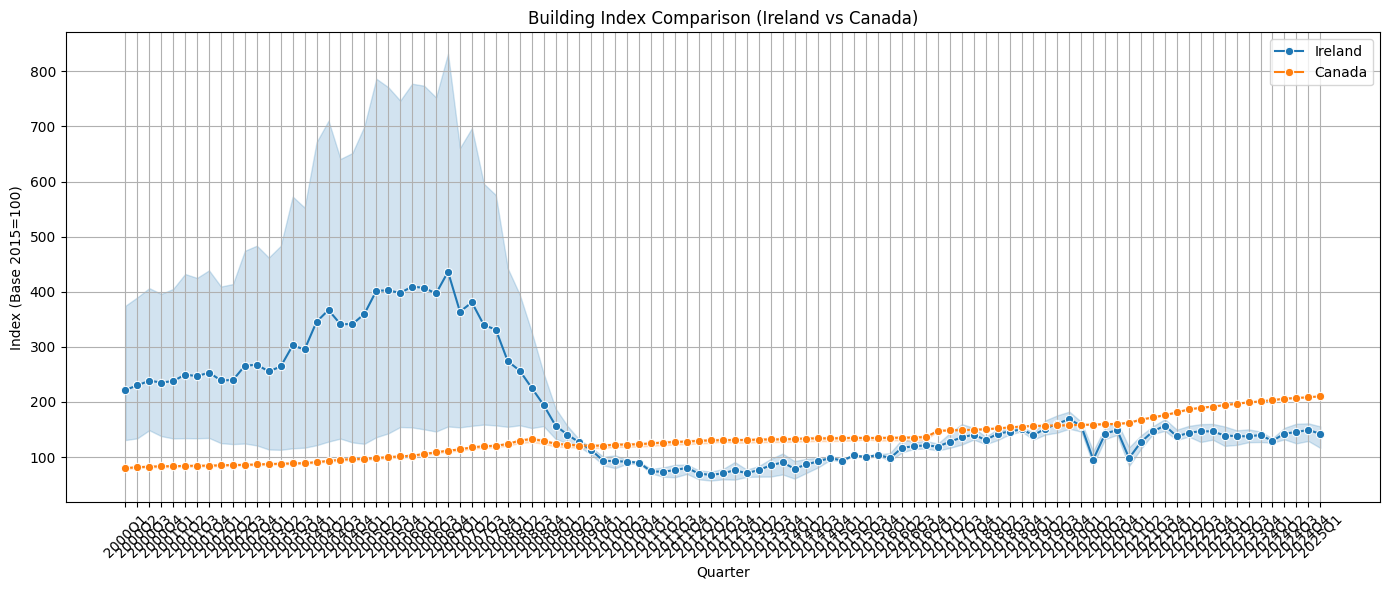

In [124]:
# Plot: Building Index Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=building_merged, x='Quarter', y='Ireland_Index', label='Ireland', marker='o')
sns.lineplot(data=building_merged, x='Quarter', y='Canada_Index_Rebased', label='Canada', marker='o')
plt.xticks(rotation=45)
plt.title('Building Index Comparison (Ireland vs Canada)')
plt.ylabel('Index (Base 2015=100)')
plt.xlabel('Quarter')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


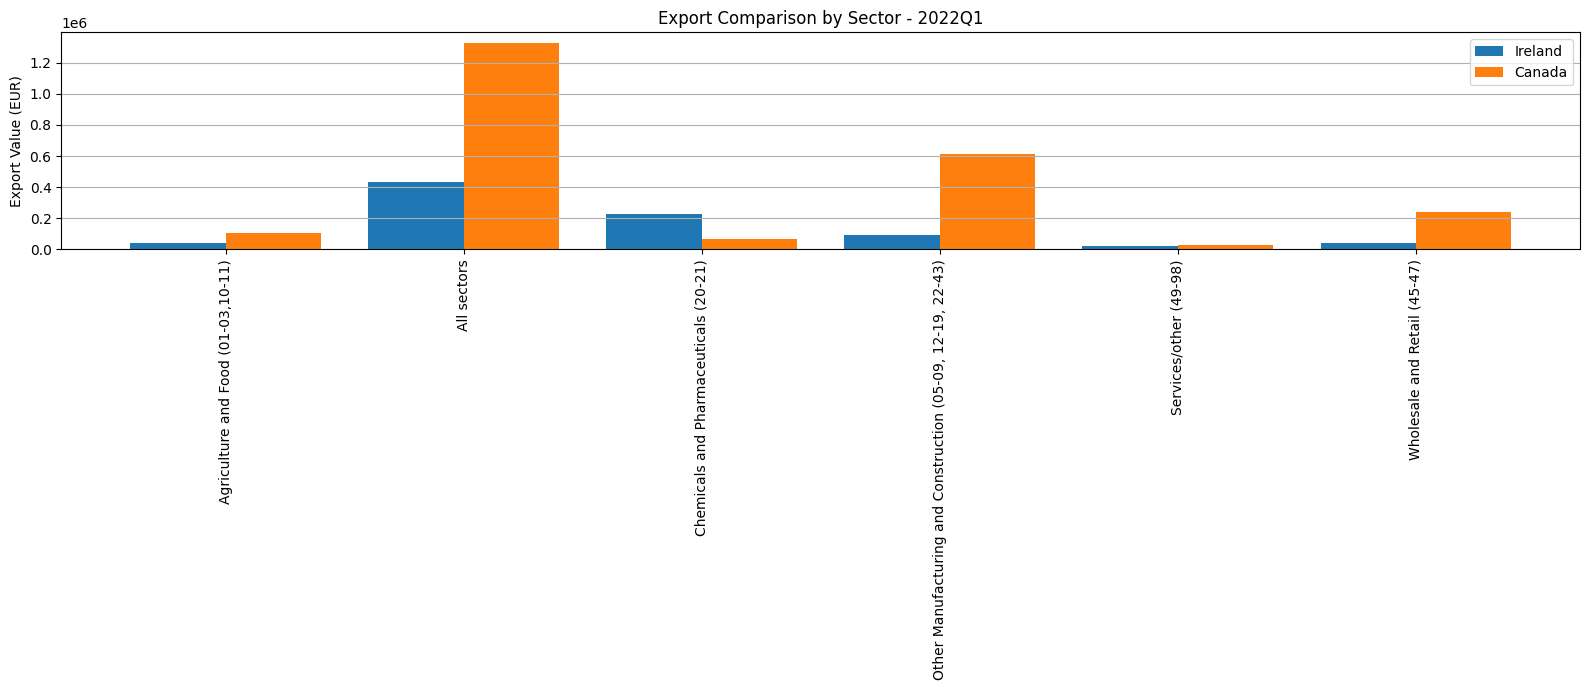

In [125]:
# Barplot: Export Value by Sector
plt.figure(figsize=(16, 7))
exports_latest = exports_merged[exports_merged['Quarter'] == exports_merged['Quarter'].max()]

bar_width = 0.4
x = range(len(exports_latest))

plt.bar([i - bar_width/2 for i in x], exports_latest['Export_Value_EUR_Ireland'], width=bar_width, label='Ireland')
plt.bar([i + bar_width/2 for i in x], exports_latest['Export_Value_EUR_Canada'], width=bar_width, label='Canada')

plt.xticks(ticks=x, labels=exports_latest['Sector of Activity'], rotation=90)
plt.ylabel('Export Value (EUR)')
plt.title(f'Export Comparison by Sector - {exports_latest["Quarter"].iloc[0]}')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# We can now save these for further EDA

In [128]:
# save the final dfs into parquet files
building_merged.to_parquet('datasets/building_merged.parquet', index=False)
exports_latest.to_parquet('datasets/exports_merged.parquet', index=False)

In [129]:
# save the final dfs into csv files for human readable 
building_merged.to_csv('datasets/building_merged.csv', index=False)
exports_latest.to_csv('datasets/exports_merged.csv', index=False)